# Toy Case

This notebook reproduces the plot shown in figure D1 of the Appendix.

In [1]:
# Import required libraries
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from bilby.core.result import read_in_result

# Add path to custom modules to sys.path
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Import custom modules
from config import *

/mnt/lustre/shared_conda/envs/hoyc/igwn-py310-20240725/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
outdir = "toy_case"
param = "toy_case_toy"

loc = [FILE_PATH.format(outdir=outdir, param=param, freq=freq) for freq in STARTING_FREQUENCIES]

toy_case = {
    DICT_KEYS[0]: read_in_result(loc[0]).posterior,
    DICT_KEYS[1]: read_in_result(loc[1]).posterior,
    DICT_KEYS[2]: read_in_result(loc[2]).posterior
}

toy_case_injection_values = read_in_result(loc[0]).injection_parameters

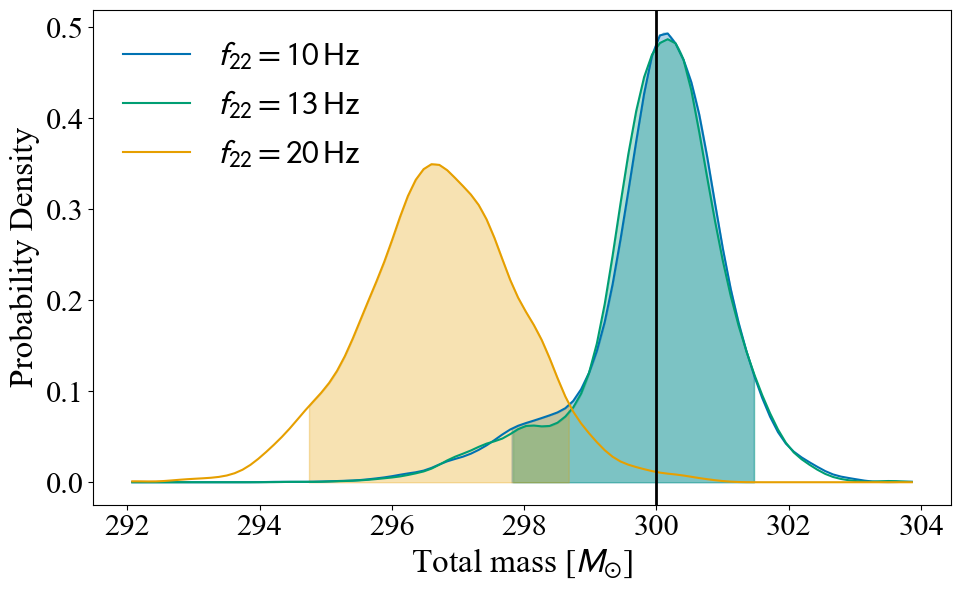

In [3]:
param = "total_mass"
truth = toy_case_injection_values['total_mass']
path_to_save = '../plots/toy_case/' # Path to save the plot
plot_name = f'toy_case_1d_histogram.png' # Name of the plot to save (default png)

fig = plt.figure()
_min = np.min([np.min(toy_case[DICT_KEYS[0]][param]), np.min(toy_case[DICT_KEYS[2]][param])])
_max = np.max([np.max(toy_case[DICT_KEYS[0]][param]), np.max(toy_case[DICT_KEYS[2]][param])])
xs = np.linspace(_min, _max, 100)

for num, ss in enumerate([toy_case[DICT_KEYS[0]][param], toy_case[DICT_KEYS[1]][param], toy_case[DICT_KEYS[2]][param]]):
    kde = gaussian_kde(ss)
    plt.plot(xs, kde(xs), color=color_map[DICT_KEYS[num]], label=label_map[DICT_KEYS[num]])
    pp = np.percentile(ss, [5, 95])
    _xs = np.linspace(pp[0], pp[1], 100)
    plt.fill_between(_xs, np.zeros_like(_xs), kde(_xs), color=color_map[DICT_KEYS[num]], alpha=0.3)
plt.axvline(truth, color='k', linewidth=2)
plt.xlabel(r"Total mass [$M_{\odot}$]")
plt.ylabel(r"Probability Density")
plt.legend(**legend_kwargs)
plt.tight_layout()
plt.savefig(path_to_save+plot_name, dpi=400)